In [91]:
import numpy as np
import matplotlib.pyplot as plt
import Bio
from Bio import SeqIO, SearchIO, Entrez
from Bio.Seq import Seq
from Bio.SeqUtils import GC
from Bio.Blast import NCBIWWW
from Bio.Data import CodonTable
from auth import auth

from IPython.core.display import Image

from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram

In [7]:
Entrez.email = auth['login']
Entrez.api_key = auth['key']

In [31]:
# NCBI_id ='NC_045512.2'  # Coronavirus
NCBI_id ='NC_043314.1'  # Diolcogaster facetosa bracovirus

In [32]:
handle = Entrez.efetch(db="nucleotide", id=NCBI_id, retmode="text", rettype="gb")
# handle.read().split('\n')

In [33]:
genbank_record = SeqIO.read(handle, "genbank")
genbank_record

SeqRecord(seq=Seq('GATCTTCTCAACATCGTTTCTGAATCAACCAATTCTCTGAAAGCTCTCGGACTT...ATC'), id='NC_043314.1', name='NC_043314', description='Diolcogaster facetosa bracovirus clone BAC 2A4, complete sequence', dbxrefs=['BioProject:PRJNA485481'])

In [34]:
[x for x in genbank_record.annotations]

['molecule_type',
 'topology',
 'data_file_division',
 'date',
 'accessions',
 'sequence_version',
 'keywords',
 'source',
 'organism',
 'taxonomy',
 'references',
 'comment']

In [35]:
interested_keys = [
    'molecule_type',
    'topology',
    'sequence_version',
    'keywords',
    'source',
    'organism',
    'taxonomy',
]

In [36]:
{x: genbank_record.annotations[x] for x in genbank_record.annotations if x in interested_keys}

{'molecule_type': 'DNA',
 'topology': 'linear',
 'sequence_version': 1,
 'keywords': ['HTG', 'RefSeq'],
 'source': 'Diolcogaster facetosa bracovirus',
 'organism': 'Diolcogaster facetosa bracovirus',
 'taxonomy': ['Viruses', 'Polydnaviridae', 'Bracovirus']}

In [37]:
{feature.type for feature in genbank_record.features}

{'CDS', 'gene', 'misc_feature', 'source'}

In [52]:
len(genbank_record.seq)

140906

In [39]:
CDSs = [feature for feature in genbank_record.features if feature.type == "CDS"]
len(CDSs)

45

In [50]:
[x.qualifiers["gene"] for x in CDSs if 'gene' in x.qualifiers]

[['bv6.11'],
 ['bv8.1'],
 ['bv18.1'],
 ['ben_2'],
 ['bv21.1'],
 ['bv6.1'],
 ['bv9.1'],
 ['bv10.1'],
 ['bv6.2'],
 ['bv8.2'],
 ['bv6.3'],
 ['bv6.4'],
 ['crp3'],
 ['bv6.5'],
 ['bv6.6'],
 ['bv8.3'],
 ['bv9.2'],
 ['bv10.2'],
 ['bv6.7'],
 ['bv23.1'],
 ['bv6.8'],
 ['bv9.3'],
 ['bv8.5'],
 ['bv6.9'],
 ['bv6.10'],
 ['ep1-1'],
 ['bv19.1']]

In [43]:
protein_seq = Seq(CDSs[0].qualifiers["translation"][0])

In [44]:
print('Protein sequence length in amino acids', len(protein_seq))

Protein sequence length in amino acids 82


In [92]:
gd_diagram = GenomeDiagram.Diagram(genbank_record.annotations['organism'])
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

In [93]:
for feature in genbank_record.features:
    if feature.type != "gene":
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.violet
    gd_feature_set.add_feature(feature, color=color, label=True, label_size=15, label_angle=0, sigil='ARROW')

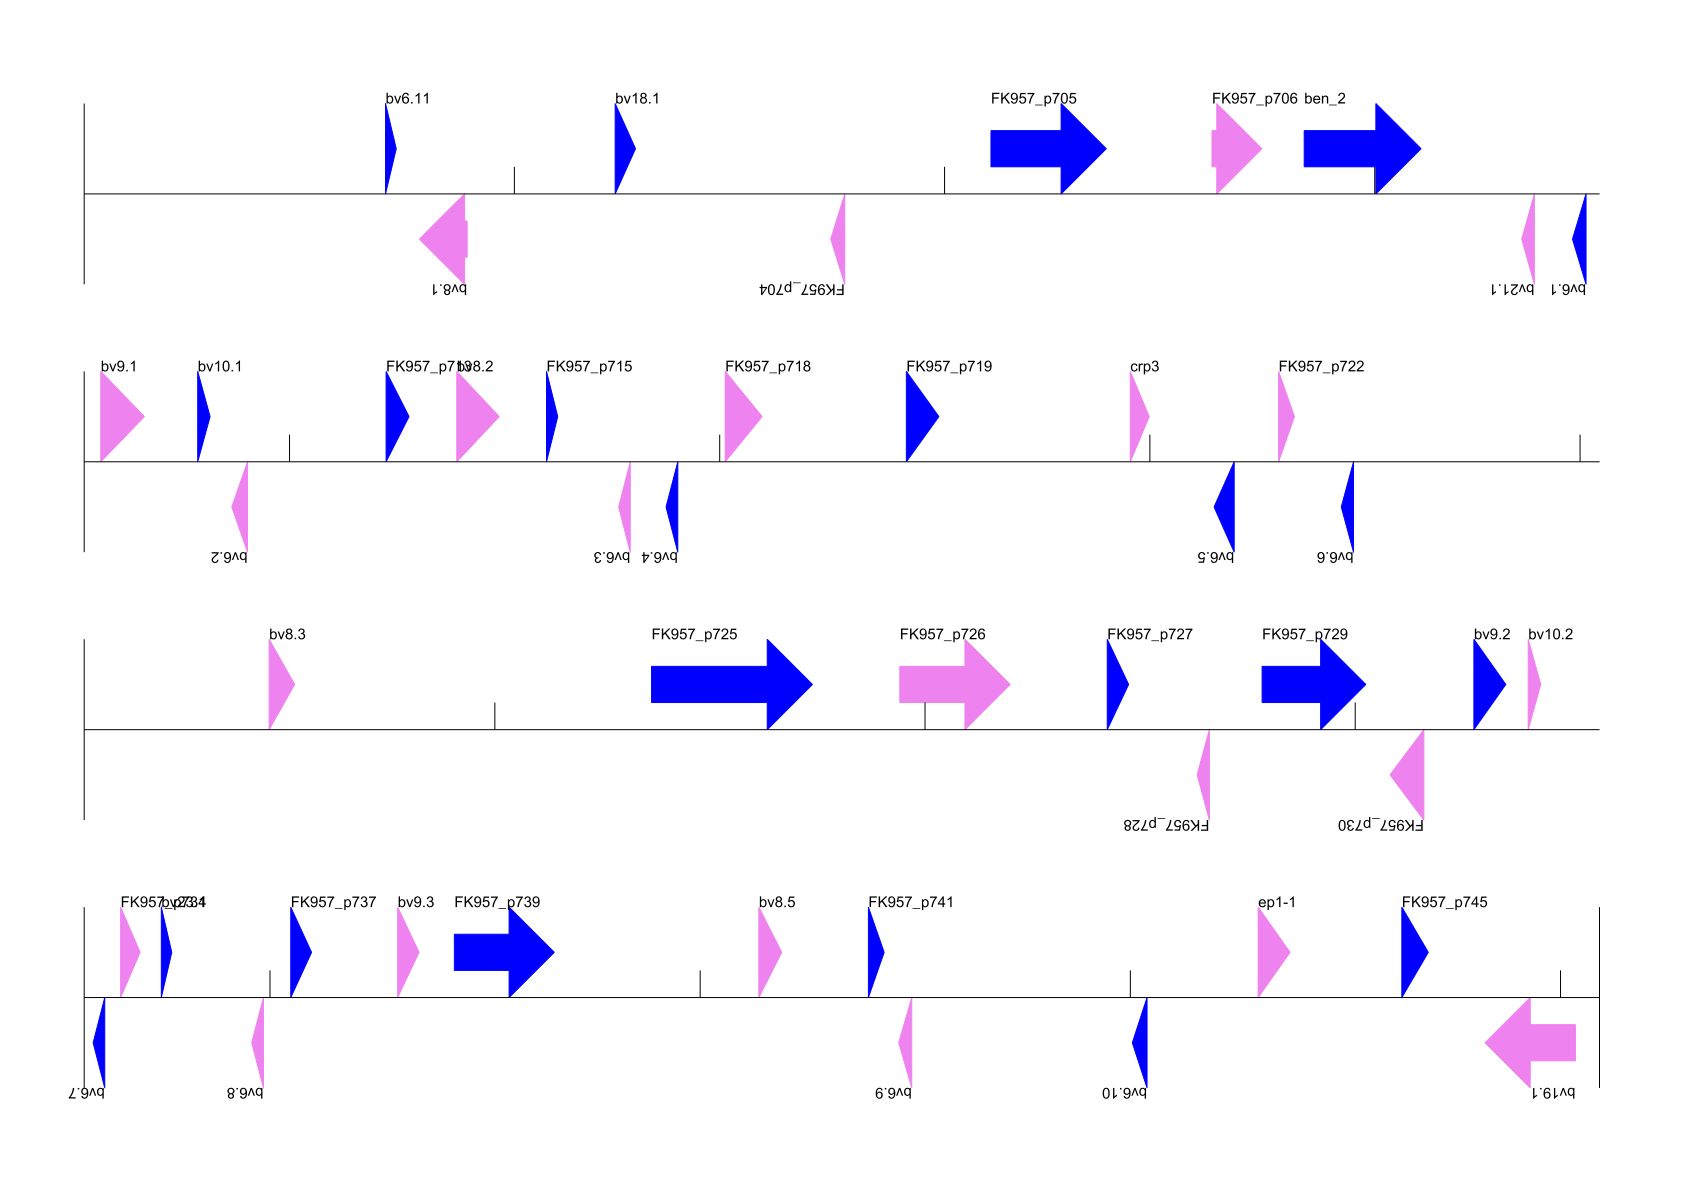

In [94]:
gd_diagram.draw(format="linear", 
                orientation="landscape", 
                pagesize='A2', 
                fragments=4, 
                start=0, 
                end=len(genbank_record))
gd_diagram.write("linear.png", "png")
Image("linear.png", retina=True)